In [1]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import LearningShapelets
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [2]:
df = pd.read_csv('data/fma_metadata/ts_normal_Fede.csv',index_col=[0])

df

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,0.583783,...,1.659076,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548
5,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,-0.172586,...,0.986330,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621
148,-1.398620,-1.179364,-0.760749,-0.668556,-0.215774,-0.222921,-0.153197,0.265194,0.854607,1.257842,...,0.799620,0.773268,0.810048,0.704623,0.624920,0.619605,0.644483,0.689480,0.706873,0.508055
182,0.831877,0.867620,1.211251,1.300045,1.009059,0.776468,1.445092,1.928781,2.086341,1.679941,...,-0.231961,0.177564,0.976858,1.312150,0.890539,0.194135,0.318079,0.535572,0.486992,0.594535
255,-0.001086,-0.109745,-0.149553,-0.249814,-0.338598,-0.294437,-0.167429,-0.541922,-0.708239,-1.260999,...,-0.579852,-1.053090,-1.056643,-0.359074,0.243012,0.159436,-0.013340,-0.244169,-0.727907,-1.238562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,-1.110754,-1.006785,-0.815322,-0.789090,-0.743797,-0.657886,-0.834670,-1.228586,-1.459256,-1.172778,...,-0.597113,-1.080429,1.155361,1.460806,-0.275518,0.091648,0.024073,-0.617410,-1.290487,-1.266442
154307,-0.476355,-0.345470,0.423441,0.826796,0.759305,0.680591,0.419693,0.143946,-0.250479,-0.323848,...,-0.987883,-1.031161,-0.967002,-0.190268,-0.372293,-0.532872,-0.863057,-1.194852,-1.370949,-1.208573
154308,-1.461760,-1.352874,-0.667393,0.180564,-0.043601,-0.641125,-0.769813,-0.651408,1.364934,2.620067,...,1.482417,1.187887,0.431956,-0.469773,-0.895047,-0.669839,-0.516315,-0.603362,-0.740841,-0.866379


In [3]:
tracks = utils.load('data/fma_metadata/tracks.csv')
tracks=tracks[[('track','genre_top')]]
tracks.columns = tracks.columns.droplevel(0)


In [4]:
TS= pd.merge(tracks, df, left_index=True, right_index=True)
TS.info()
TS

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 2 to 155066
Columns: 658 entries, genre_top to 656
dtypes: category(1), float64(657)
memory usage: 20.1 MB


,genre_top,0,1,2,3,4,5,6,7,8,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,Hip-Hop,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,...,1.659076,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548
5,Hip-Hop,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,...,0.986330,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621
148,Experimental,-1.398620,-1.179364,-0.760749,-0.668556,-0.215774,-0.222921,-0.153197,0.265194,0.854607,...,0.799620,0.773268,0.810048,0.704623,0.624920,0.619605,0.644483,0.689480,0.706873,0.508055
182,Rock,0.831877,0.867620,1.211251,1.300045,1.009059,0.776468,1.445092,1.928781,2.086341,...,-0.231961,0.177564,0.976858,1.312150,0.890539,0.194135,0.318079,0.535572,0.486992,0.594535
255,Rock,-0.001086,-0.109745,-0.149553,-0.249814,-0.338598,-0.294437,-0.167429,-0.541922,-0.708239,...,-0.579852,-1.053090,-1.056643,-0.359074,0.243012,0.159436,-0.013340,-0.244169,-0.727907,-1.238562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,Hip-Hop,-1.110754,-1.006785,-0.815322,-0.789090,-0.743797,-0.657886,-0.834670,-1.228586,-1.459256,...,-0.597113,-1.080429,1.155361,1.460806,-0.275518,0.091648,0.024073,-0.617410,-1.290487,-1.266442
154307,Hip-Hop,-0.476355,-0.345470,0.423441,0.826796,0.759305,0.680591,0.419693,0.143946,-0.250479,...,-0.987883,-1.031161,-0.967002,-0.190268,-0.372293,-0.532872,-0.863057,-1.194852,-1.370949,-1.208573
154308,Hip-Hop,-1.461760,-1.352874,-0.667393,0.180564,-0.043601,-0.641125,-0.769813,-0.651408,1.364934,...,1.482417,1.187887,0.431956,-0.469773,-0.895047,-0.669839,-0.516315,-0.603362,-0.740841,-0.866379


In [5]:

attributes = [col for col in TS.columns if (col != 'genre_top')] 

X = TS[attributes].values
y = TS['genre_top']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [33]:
n_ts, ts_sz = X.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.05,
                                                       r=4)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 3994
ts_sz 657
n_classes 4
shapelet_sizes {32: 6, 64: 6, 96: 6, 128: 6}


## Logistic Regression time series

In [10]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [11]:
param_grid = {'optimizer':["Adam"],
             'max_iter':[150],
             'batch_size':[30,100],
             'weight_regularizer':[1,0.1,0.01,0]}


dt1 = GridSearchCV(LearningShapelets(n_shapelets_per_size=shapelet_sizes,verbose=1,random_state=0), 
                         param_grid, cv=StratifiedKFold(2),scoring='accuracy')

dt1_fit = dt1.fit(X_train, y_train)
report(dt1_fit.cv_results_, n_top=5)

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "
C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
47/47 [==============================] - 1s 9ms/step - loss: 7.4280 - categorical_accuracy: 0.2920 - categorical_crossentropy: 1.5321
Epoch 2/150
47/47 [==============================] - 0s 10ms/step - loss: 6.4924 - categorical_accuracy: 0.2747 - categorical_crossentropy: 1.5173
Epoch 3/150
47/47 [==============================] - 0s 9ms/step - loss: 5.6609 - categorical_accuracy: 0.2603 - categorical_crossentropy: 1.4773
Epoch 4/150
47/47 [==============================] - 0s 10ms/step - loss: 4.9424 - categorical_accuracy: 0.2781 - categorical_crossentropy: 1.4374
Epoch 5/150
47/47 [==============================] - 0s 10ms/step - loss: 4.3595 - categorical_accuracy: 0.2531 - categorical_crossentropy: 1.4356
Epoch 6/150
47/47 [==============================] - 1s 12ms/step - loss: 3.8533 - categorical_accuracy: 0.2436 - categorical_crossentropy: 1.4249
Epoch 7/150
47/47 [==============================] - 0s 9ms/step - loss: 3.4279 - categorical_accuracy: 0.2421 - categor

47/47 [==============================] - 1s 11ms/step - loss: 1.3845 - categorical_accuracy: 0.3617 - categorical_crossentropy: 1.3829
Epoch 56/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3847 - categorical_accuracy: 0.3908 - categorical_crossentropy: 1.3832
Epoch 57/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3848 - categorical_accuracy: 0.3436 - categorical_crossentropy: 1.3832
Epoch 58/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3846 - categorical_accuracy: 0.3515 - categorical_crossentropy: 1.3830
Epoch 59/150
47/47 [==============================] - 0s 11ms/step - loss: 1.3847 - categorical_accuracy: 0.3564 - categorical_crossentropy: 1.3830
Epoch 60/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3846 - categorical_accuracy: 0.3766 - categorical_crossentropy: 1.3831
Epoch 61/150
47/47 [==============================] - 1s 13ms/step - loss: 1.3847 - categorical_accuracy: 0.3523 - categorica

47/47 [==============================] - 1s 11ms/step - loss: 1.3798 - categorical_accuracy: 0.3367 - categorical_crossentropy: 1.3741: 0s - loss: 1.3799 - categorical_accuracy: 0.3363 - categorical_crossentropy: 1.374
Epoch 111/150
47/47 [==============================] - 1s 12ms/step - loss: 1.3792 - categorical_accuracy: 0.3518 - categorical_crossentropy: 1.3735
Epoch 112/150
47/47 [==============================] - 1s 12ms/step - loss: 1.3784 - categorical_accuracy: 0.3548 - categorical_crossentropy: 1.3723
Epoch 113/150
47/47 [==============================] - 1s 12ms/step - loss: 1.3787 - categorical_accuracy: 0.3160 - categorical_crossentropy: 1.3725
Epoch 114/150
47/47 [==============================] - 1s 12ms/step - loss: 1.3770 - categorical_accuracy: 0.3560 - categorical_crossentropy: 1.3711
Epoch 115/150
47/47 [==============================] - 1s 12ms/step - loss: 1.3780 - categorical_accuracy: 0.3538 - categorical_crossentropy: 1.3715
Epoch 116/150
47/47 [===============

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
47/47 [==============================] - 2s 11ms/step - loss: 7.3928 - categorical_accuracy: 0.2771 - categorical_crossentropy: 1.4970
Epoch 2/150
47/47 [==============================] - 0s 10ms/step - loss: 6.4433 - categorical_accuracy: 0.2731 - categorical_crossentropy: 1.4684
Epoch 3/150
47/47 [==============================] - 1s 11ms/step - loss: 5.6369 - categorical_accuracy: 0.2746 - categorical_crossentropy: 1.4538
Epoch 4/150
47/47 [==============================] - 0s 10ms/step - loss: 4.9361 - categorical_accuracy: 0.2807 - categorical_crossentropy: 1.4318
Epoch 5/150
47/47 [==============================] - 1s 12ms/step - loss: 4.3422 - categorical_accuracy: 0.2617 - categorical_crossentropy: 1.4187
Epoch 6/150
47/47 [==============================] - 1s 12ms/step - loss: 3.8450 - categorical_accuracy: 0.2289 - categorical_crossentropy: 1.4173
Epoch 7/150
47/47 [==============================] - 1s 12ms/step - loss: 3.4205 - categorical_accuracy: 0.2230 - cate

47/47 [==============================] - 0s 10ms/step - loss: 1.3848 - categorical_accuracy: 0.3944 - categorical_crossentropy: 1.3833
Epoch 56/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3848 - categorical_accuracy: 0.3632 - categorical_crossentropy: 1.3831
Epoch 57/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3849 - categorical_accuracy: 0.3719 - categorical_crossentropy: 1.3834
Epoch 58/150
47/47 [==============================] - 1s 13ms/step - loss: 1.3845 - categorical_accuracy: 0.3978 - categorical_crossentropy: 1.3828
Epoch 59/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3845 - categorical_accuracy: 0.3997 - categorical_crossentropy: 1.3828: 0s - loss: 1.3838 - categorical_accuracy: 0.4499 - categorical_crossentrop
Epoch 60/150
47/47 [==============================] - 1s 14ms/step - loss: 1.3849 - categorical_accuracy: 0.3817 - categorical_crossentropy: 1.3833: 0s - loss: 1.3849 - categorical_accuracy: 0.3912

47/47 [==============================] - 1s 12ms/step - loss: 1.3735 - categorical_accuracy: 0.3409 - categorical_crossentropy: 1.3645
Epoch 110/150
47/47 [==============================] - 1s 12ms/step - loss: 1.3713 - categorical_accuracy: 0.3648 - categorical_crossentropy: 1.3632
Epoch 111/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3755 - categorical_accuracy: 0.3561 - categorical_crossentropy: 1.3675
Epoch 112/150
47/47 [==============================] - 1s 12ms/step - loss: 1.3742 - categorical_accuracy: 0.3712 - categorical_crossentropy: 1.3663
Epoch 113/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3738 - categorical_accuracy: 0.3517 - categorical_crossentropy: 1.3648
Epoch 114/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3738 - categorical_accuracy: 0.3469 - categorical_crossentropy: 1.3646
Epoch 115/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3741 - categorical_accuracy: 0.3563 - cate

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
47/47 [==============================] - 1s 9ms/step - loss: 2.1226 - categorical_accuracy: 0.2917 - categorical_crossentropy: 1.5318
Epoch 2/150
47/47 [==============================] - 0s 9ms/step - loss: 2.0194 - categorical_accuracy: 0.2754 - categorical_crossentropy: 1.5150
Epoch 3/150
47/47 [==============================] - 0s 10ms/step - loss: 1.9028 - categorical_accuracy: 0.2593 - categorical_crossentropy: 1.4736
Epoch 4/150
47/47 [==============================] - 0s 9ms/step - loss: 1.7970 - categorical_accuracy: 0.2842 - categorical_crossentropy: 1.4331
Epoch 5/150
47/47 [==============================] - 0s 10ms/step - loss: 1.7378 - categorical_accuracy: 0.2609 - categorical_crossentropy: 1.4303
Epoch 6/150
47/47 [==============================] - 0s 9ms/step - loss: 1.6779 - categorical_accuracy: 0.2480 - categorical_crossentropy: 1.4190
Epoch 7/150
47/47 [==============================] - 0s 10ms/step - loss: 1.6321 - categorical_accuracy: 0.2520 - categori

47/47 [==============================] - 1s 14ms/step - loss: 1.3594 - categorical_accuracy: 0.3747 - categorical_crossentropy: 1.3480
Epoch 55/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3595 - categorical_accuracy: 0.3733 - categorical_crossentropy: 1.3477
Epoch 56/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3621 - categorical_accuracy: 0.3728 - categorical_crossentropy: 1.3503
Epoch 57/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3643 - categorical_accuracy: 0.3445 - categorical_crossentropy: 1.3526
Epoch 58/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3610 - categorical_accuracy: 0.3625 - categorical_crossentropy: 1.3490
Epoch 59/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3606 - categorical_accuracy: 0.3638 - categorical_crossentropy: 1.3483
Epoch 60/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3612 - categorical_accuracy: 0.3942 - categorica

47/47 [==============================] - 0s 9ms/step - loss: 1.3371 - categorical_accuracy: 0.4030 - categorical_crossentropy: 1.3198
Epoch 109/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3400 - categorical_accuracy: 0.3821 - categorical_crossentropy: 1.3224
Epoch 110/150
47/47 [==============================] - 0s 9ms/step - loss: 1.3442 - categorical_accuracy: 0.3858 - categorical_crossentropy: 1.3266
Epoch 111/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3433 - categorical_accuracy: 0.3999 - categorical_crossentropy: 1.3258
Epoch 112/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3398 - categorical_accuracy: 0.4002 - categorical_crossentropy: 1.3221
Epoch 113/150
47/47 [==============================] - 1s 13ms/step - loss: 1.3441 - categorical_accuracy: 0.3899 - categorical_crossentropy: 1.3261
Epoch 114/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3331 - categorical_accuracy: 0.3912 - catego

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
47/47 [==============================] - 1s 9ms/step - loss: 2.0870 - categorical_accuracy: 0.2756 - categorical_crossentropy: 1.4964
Epoch 2/150
47/47 [==============================] - 0s 9ms/step - loss: 1.9682 - categorical_accuracy: 0.2709 - categorical_crossentropy: 1.4656
Epoch 3/150
47/47 [==============================] - 0s 10ms/step - loss: 1.8761 - categorical_accuracy: 0.2696 - categorical_crossentropy: 1.4499
Epoch 4/150
47/47 [==============================] - 0s 9ms/step - loss: 1.7867 - categorical_accuracy: 0.2874 - categorical_crossentropy: 1.4263
Epoch 5/150
47/47 [==============================] - 0s 10ms/step - loss: 1.7172 - categorical_accuracy: 0.2719 - categorical_crossentropy: 1.4134
Epoch 6/150
47/47 [==============================] - 0s 9ms/step - loss: 1.6661 - categorical_accuracy: 0.2427 - categorical_crossentropy: 1.4110
Epoch 7/150
47/47 [==============================] - 0s 10ms/step - loss: 1.6218 - categorical_accuracy: 0.2267 - categori

47/47 [==============================] - 1s 12ms/step - loss: 1.3562 - categorical_accuracy: 0.3709 - categorical_crossentropy: 1.3428
Epoch 57/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3560 - categorical_accuracy: 0.3567 - categorical_crossentropy: 1.3427
Epoch 58/150
47/47 [==============================] - 0s 9ms/step - loss: 1.3515 - categorical_accuracy: 0.3897 - categorical_crossentropy: 1.3381
Epoch 59/150
47/47 [==============================] - 0s 9ms/step - loss: 1.3489 - categorical_accuracy: 0.3802 - categorical_crossentropy: 1.3350
Epoch 60/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3575 - categorical_accuracy: 0.3622 - categorical_crossentropy: 1.3440
Epoch 61/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3564 - categorical_accuracy: 0.3612 - categorical_crossentropy: 1.3427
Epoch 62/150
47/47 [==============================] - 0s 11ms/step - loss: 1.3440 - categorical_accuracy: 0.3810 - categorical_

47/47 [==============================] - 1s 11ms/step - loss: 1.3205 - categorical_accuracy: 0.4105 - categorical_crossentropy: 1.3022
Epoch 111/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3362 - categorical_accuracy: 0.3902 - categorical_crossentropy: 1.3180
Epoch 112/150
47/47 [==============================] - 1s 13ms/step - loss: 1.3284 - categorical_accuracy: 0.3973 - categorical_crossentropy: 1.3101
Epoch 113/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3307 - categorical_accuracy: 0.3820 - categorical_crossentropy: 1.3119
Epoch 114/150
47/47 [==============================] - 1s 12ms/step - loss: 1.3304 - categorical_accuracy: 0.3954 - categorical_crossentropy: 1.3112
Epoch 115/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3310 - categorical_accuracy: 0.3896 - categorical_crossentropy: 1.3122
Epoch 116/150
47/47 [==============================] - 0s 9ms/step - loss: 1.3249 - categorical_accuracy: 0.4048 - categ

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
47/47 [==============================] - 2s 10ms/step - loss: 1.5892 - categorical_accuracy: 0.2901 - categorical_crossentropy: 1.5288
Epoch 2/150
47/47 [==============================] - 1s 12ms/step - loss: 1.5589 - categorical_accuracy: 0.2701 - categorical_crossentropy: 1.5023
Epoch 3/150
47/47 [==============================] - 1s 11ms/step - loss: 1.5098 - categorical_accuracy: 0.2609 - categorical_crossentropy: 1.4563
Epoch 4/150
47/47 [==============================] - 1s 12ms/step - loss: 1.4685 - categorical_accuracy: 0.2880 - categorical_crossentropy: 1.4177
Epoch 5/150
47/47 [==============================] - 0s 10ms/step - loss: 1.4567 - categorical_accuracy: 0.2540 - categorical_crossentropy: 1.4083
Epoch 6/150
47/47 [==============================] - 1s 11ms/step - loss: 1.4444 - categorical_accuracy: 0.2307 - categorical_crossentropy: 1.3983
Epoch 7/150
47/47 [==============================] - 1s 12ms/step - loss: 1.4354 - categorical_accuracy: 0.2623 - cate

47/47 [==============================] - 1s 11ms/step - loss: 1.3123 - categorical_accuracy: 0.4275 - categorical_crossentropy: 1.2928
Epoch 56/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3220 - categorical_accuracy: 0.4272 - categorical_crossentropy: 1.3025
Epoch 57/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3251 - categorical_accuracy: 0.4111 - categorical_crossentropy: 1.3055
Epoch 58/150
47/47 [==============================] - 0s 11ms/step - loss: 1.3200 - categorical_accuracy: 0.4268 - categorical_crossentropy: 1.3003
Epoch 59/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3147 - categorical_accuracy: 0.4345 - categorical_crossentropy: 1.2948
Epoch 60/150
47/47 [==============================] - 1s 12ms/step - loss: 1.3170 - categorical_accuracy: 0.4323 - categorical_crossentropy: 1.2971
Epoch 61/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3177 - categorical_accuracy: 0.4330 - categorica

47/47 [==============================] - 1s 11ms/step - loss: 1.2976 - categorical_accuracy: 0.4350 - categorical_crossentropy: 1.2738
Epoch 111/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3015 - categorical_accuracy: 0.4446 - categorical_crossentropy: 1.2778
Epoch 112/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2892 - categorical_accuracy: 0.4511 - categorical_crossentropy: 1.2654
Epoch 113/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2991 - categorical_accuracy: 0.4448 - categorical_crossentropy: 1.2753
Epoch 114/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2803 - categorical_accuracy: 0.4400 - categorical_crossentropy: 1.2565
Epoch 115/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2936 - categorical_accuracy: 0.4343 - categorical_crossentropy: 1.2697
Epoch 116/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2877 - categorical_accuracy: 0.4348 - cate

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
47/47 [==============================] - 2s 11ms/step - loss: 1.5534 - categorical_accuracy: 0.2759 - categorical_crossentropy: 1.4931
Epoch 2/150
47/47 [==============================] - 0s 10ms/step - loss: 1.5095 - categorical_accuracy: 0.2629 - categorical_crossentropy: 1.4533
Epoch 3/150
47/47 [==============================] - 1s 11ms/step - loss: 1.4857 - categorical_accuracy: 0.2748 - categorical_crossentropy: 1.4328
Epoch 4/150
47/47 [==============================] - 0s 10ms/step - loss: 1.4572 - categorical_accuracy: 0.2812 - categorical_crossentropy: 1.4071
Epoch 5/150
47/47 [==============================] - 1s 11ms/step - loss: 1.4438 - categorical_accuracy: 0.2627 - categorical_crossentropy: 1.3964
Epoch 6/150
47/47 [==============================] - 0s 10ms/step - loss: 1.4347 - categorical_accuracy: 0.2467 - categorical_crossentropy: 1.3898
Epoch 7/150
47/47 [==============================] - 1s 11ms/step - loss: 1.4316 - categorical_accuracy: 0.2593 - cate

47/47 [==============================] - 1s 14ms/step - loss: 1.3196 - categorical_accuracy: 0.4007 - categorical_crossentropy: 1.3033
Epoch 56/150
47/47 [==============================] - 1s 13ms/step - loss: 1.3193 - categorical_accuracy: 0.4048 - categorical_crossentropy: 1.3029
Epoch 57/150
47/47 [==============================] - 1s 13ms/step - loss: 1.3259 - categorical_accuracy: 0.3999 - categorical_crossentropy: 1.3096
Epoch 58/150
47/47 [==============================] - 1s 14ms/step - loss: 1.3099 - categorical_accuracy: 0.4161 - categorical_crossentropy: 1.2935
Epoch 59/150
47/47 [==============================] - 1s 13ms/step - loss: 1.3090 - categorical_accuracy: 0.4072 - categorical_crossentropy: 1.2924
Epoch 60/150
47/47 [==============================] - 1s 13ms/step - loss: 1.3232 - categorical_accuracy: 0.4058 - categorical_crossentropy: 1.3067
Epoch 61/150
47/47 [==============================] - 1s 13ms/step - loss: 1.3182 - categorical_accuracy: 0.3941 - categorica

47/47 [==============================] - 0s 10ms/step - loss: 1.2820 - categorical_accuracy: 0.4178 - categorical_crossentropy: 1.2600
Epoch 110/150
47/47 [==============================] - 0s 10ms/step - loss: 1.2664 - categorical_accuracy: 0.4394 - categorical_crossentropy: 1.2446
Epoch 111/150
47/47 [==============================] - 1s 13ms/step - loss: 1.2913 - categorical_accuracy: 0.4082 - categorical_crossentropy: 1.2694
Epoch 112/150
47/47 [==============================] - 1s 13ms/step - loss: 1.2762 - categorical_accuracy: 0.4219 - categorical_crossentropy: 1.2542
Epoch 113/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2829 - categorical_accuracy: 0.4190 - categorical_crossentropy: 1.2608
Epoch 114/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2836 - categorical_accuracy: 0.4163 - categorical_crossentropy: 1.2613
Epoch 115/150
47/47 [==============================] - 1s 12ms/step - loss: 1.2848 - categorical_accuracy: 0.4272 - cate

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
47/47 [==============================] - 1s 9ms/step - loss: 1.5288 - categorical_accuracy: 0.2901 - categorical_crossentropy: 1.5288
Epoch 2/150
47/47 [==============================] - 0s 11ms/step - loss: 1.5026 - categorical_accuracy: 0.2698 - categorical_crossentropy: 1.5026
Epoch 3/150
47/47 [==============================] - 0s 9ms/step - loss: 1.4566 - categorical_accuracy: 0.2587 - categorical_crossentropy: 1.4566
Epoch 4/150
47/47 [==============================] - 0s 9ms/step - loss: 1.4179 - categorical_accuracy: 0.2870 - categorical_crossentropy: 1.4179
Epoch 5/150
47/47 [==============================] - 0s 10ms/step - loss: 1.4083 - categorical_accuracy: 0.2519 - categorical_crossentropy: 1.4083
Epoch 6/150
47/47 [==============================] - 0s 9ms/step - loss: 1.3979 - categorical_accuracy: 0.2357 - categorical_crossentropy: 1.3979
Epoch 7/150
47/47 [==============================] - 0s 10ms/step - loss: 1.3904 - categorical_accuracy: 0.2633 - categori

47/47 [==============================] - 0s 10ms/step - loss: 1.2758 - categorical_accuracy: 0.4539 - categorical_crossentropy: 1.2758
Epoch 57/150
47/47 [==============================] - 0s 9ms/step - loss: 1.2785 - categorical_accuracy: 0.4357 - categorical_crossentropy: 1.2785
Epoch 58/150
47/47 [==============================] - 0s 10ms/step - loss: 1.2760 - categorical_accuracy: 0.4489 - categorical_crossentropy: 1.2760
Epoch 59/150
47/47 [==============================] - 0s 9ms/step - loss: 1.2655 - categorical_accuracy: 0.4635 - categorical_crossentropy: 1.2655
Epoch 60/150
47/47 [==============================] - 0s 10ms/step - loss: 1.2691 - categorical_accuracy: 0.4463 - categorical_crossentropy: 1.2691
Epoch 61/150
47/47 [==============================] - 0s 9ms/step - loss: 1.2689 - categorical_accuracy: 0.4683 - categorical_crossentropy: 1.2689
Epoch 62/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2683 - categorical_accuracy: 0.4477 - categorical_c

47/47 [==============================] - 1s 11ms/step - loss: 1.2497 - categorical_accuracy: 0.4558 - categorical_crossentropy: 1.2497
Epoch 111/150
47/47 [==============================] - 0s 10ms/step - loss: 1.2512 - categorical_accuracy: 0.4587 - categorical_crossentropy: 1.2512
Epoch 112/150
47/47 [==============================] - 1s 12ms/step - loss: 1.2308 - categorical_accuracy: 0.4823 - categorical_crossentropy: 1.2308
Epoch 113/150
47/47 [==============================] - 1s 12ms/step - loss: 1.2453 - categorical_accuracy: 0.4656 - categorical_crossentropy: 1.2453
Epoch 114/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2197 - categorical_accuracy: 0.4704 - categorical_crossentropy: 1.2197
Epoch 115/150
47/47 [==============================] - 0s 10ms/step - loss: 1.2419 - categorical_accuracy: 0.4581 - categorical_crossentropy: 1.2419
Epoch 116/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2400 - categorical_accuracy: 0.4684 - cate

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
47/47 [==============================] - 2s 10ms/step - loss: 1.4930 - categorical_accuracy: 0.2757 - categorical_crossentropy: 1.4930
Epoch 2/150
47/47 [==============================] - 0s 9ms/step - loss: 1.4533 - categorical_accuracy: 0.2628 - categorical_crossentropy: 1.4533
Epoch 3/150
47/47 [==============================] - 1s 11ms/step - loss: 1.4330 - categorical_accuracy: 0.2770 - categorical_crossentropy: 1.4330
Epoch 4/150
47/47 [==============================] - 0s 10ms/step - loss: 1.4073 - categorical_accuracy: 0.2847 - categorical_crossentropy: 1.4073
Epoch 5/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3965 - categorical_accuracy: 0.2582 - categorical_crossentropy: 1.3965
Epoch 6/150
47/47 [==============================] - 0s 9ms/step - loss: 1.3897 - categorical_accuracy: 0.2484 - categorical_crossentropy: 1.3897
Epoch 7/150
47/47 [==============================] - 1s 11ms/step - loss: 1.3889 - categorical_accuracy: 0.2586 - catego

47/47 [==============================] - 1s 11ms/step - loss: 1.2771 - categorical_accuracy: 0.4212 - categorical_crossentropy: 1.2771
Epoch 56/150
47/47 [==============================] - 0s 10ms/step - loss: 1.2761 - categorical_accuracy: 0.4219 - categorical_crossentropy: 1.2761
Epoch 57/150
47/47 [==============================] - 0s 10ms/step - loss: 1.2898 - categorical_accuracy: 0.4143 - categorical_crossentropy: 1.2898
Epoch 58/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2631 - categorical_accuracy: 0.4402 - categorical_crossentropy: 1.2631
Epoch 59/150
47/47 [==============================] - 1s 13ms/step - loss: 1.2665 - categorical_accuracy: 0.4214 - categorical_crossentropy: 1.2665
Epoch 60/150
47/47 [==============================] - 1s 12ms/step - loss: 1.2809 - categorical_accuracy: 0.4280 - categorical_crossentropy: 1.2809
Epoch 61/150
47/47 [==============================] - 1s 13ms/step - loss: 1.2770 - categorical_accuracy: 0.4313 - categorica

47/47 [==============================] - 0s 10ms/step - loss: 1.2303 - categorical_accuracy: 0.4661 - categorical_crossentropy: 1.2303
Epoch 110/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2162 - categorical_accuracy: 0.4720 - categorical_crossentropy: 1.2162
Epoch 111/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2431 - categorical_accuracy: 0.4533 - categorical_crossentropy: 1.2431
Epoch 112/150
47/47 [==============================] - 0s 10ms/step - loss: 1.2289 - categorical_accuracy: 0.4610 - categorical_crossentropy: 1.2289
Epoch 113/150
47/47 [==============================] - 0s 9ms/step - loss: 1.2358 - categorical_accuracy: 0.4535 - categorical_crossentropy: 1.2358
Epoch 114/150
47/47 [==============================] - 1s 11ms/step - loss: 1.2375 - categorical_accuracy: 0.4618 - categorical_crossentropy: 1.2375
Epoch 115/150
47/47 [==============================] - 0s 10ms/step - loss: 1.2274 - categorical_accuracy: 0.4549 - categ

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
14/14 [==============================] - 2s 29ms/step - loss: 7.6088 - categorical_accuracy: 0.2886 - categorical_crossentropy: 1.5402
Epoch 2/150
14/14 [==============================] - 0s 29ms/step - loss: 7.3145 - categorical_accuracy: 0.2776 - categorical_crossentropy: 1.5414
Epoch 3/150
14/14 [==============================] - 0s 29ms/step - loss: 7.0102 - categorical_accuracy: 0.2745 - categorical_crossentropy: 1.5208
Epoch 4/150
14/14 [==============================] - 0s 32ms/step - loss: 6.7019 - categorical_accuracy: 0.2961 - categorical_crossentropy: 1.4840
Epoch 5/150
14/14 [==============================] - 0s 32ms/step - loss: 6.4517 - categorical_accuracy: 0.2845 - categorical_crossentropy: 1.4931
Epoch 6/150
14/14 [==============================] - 0s 31ms/step - loss: 6.1952 - categorical_accuracy: 0.2777 - categorical_crossentropy: 1.4846
Epoch 7/150
14/14 [==============================] - 0s 31ms/step - loss: 5.9607 - categorical_accuracy: 0.2679 - cate

14/14 [==============================] - 0s 26ms/step - loss: 1.5927 - categorical_accuracy: 0.2796 - categorical_crossentropy: 1.3866
Epoch 57/150
14/14 [==============================] - 0s 27ms/step - loss: 1.5797 - categorical_accuracy: 0.2649 - categorical_crossentropy: 1.3886
Epoch 58/150
14/14 [==============================] - 0s 27ms/step - loss: 1.5656 - categorical_accuracy: 0.2675 - categorical_crossentropy: 1.3887
Epoch 59/150
14/14 [==============================] - 0s 27ms/step - loss: 1.5506 - categorical_accuracy: 0.2688 - categorical_crossentropy: 1.3868
Epoch 60/150
14/14 [==============================] - 0s 26ms/step - loss: 1.5381 - categorical_accuracy: 0.2746 - categorical_crossentropy: 1.3866
Epoch 61/150
14/14 [==============================] - 0s 26ms/step - loss: 1.5263 - categorical_accuracy: 0.2630 - categorical_crossentropy: 1.3862
Epoch 62/150
14/14 [==============================] - 0s 29ms/step - loss: 1.5173 - categorical_accuracy: 0.2589 - categorica

14/14 [==============================] - 0s 30ms/step - loss: 1.3861 - categorical_accuracy: 0.3006 - categorical_crossentropy: 1.3836
Epoch 112/150
14/14 [==============================] - 0s 27ms/step - loss: 1.3857 - categorical_accuracy: 0.3062 - categorical_crossentropy: 1.3833
Epoch 113/150
14/14 [==============================] - 0s 28ms/step - loss: 1.3857 - categorical_accuracy: 0.2947 - categorical_crossentropy: 1.3834
Epoch 114/150
14/14 [==============================] - 0s 28ms/step - loss: 1.3855 - categorical_accuracy: 0.3067 - categorical_crossentropy: 1.3833
Epoch 115/150
14/14 [==============================] - 0s 27ms/step - loss: 1.3853 - categorical_accuracy: 0.3331 - categorical_crossentropy: 1.3832
Epoch 116/150
14/14 [==============================] - 0s 28ms/step - loss: 1.3853 - categorical_accuracy: 0.3267 - categorical_crossentropy: 1.3832
Epoch 117/150
14/14 [==============================] - 0s 31ms/step - loss: 1.3852 - categorical_accuracy: 0.3434 - cate

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
14/14 [==============================] - 1s 27ms/step - loss: 7.5719 - categorical_accuracy: 0.2717 - categorical_crossentropy: 1.5033
Epoch 2/150
14/14 [==============================] - 0s 27ms/step - loss: 7.2619 - categorical_accuracy: 0.2599 - categorical_crossentropy: 1.4888
Epoch 3/150
14/14 [==============================] - 0s 26ms/step - loss: 6.9753 - categorical_accuracy: 0.2639 - categorical_crossentropy: 1.4860
Epoch 4/150
14/14 [==============================] - 0s 30ms/step - loss: 6.6874 - categorical_accuracy: 0.2712 - categorical_crossentropy: 1.4697
Epoch 5/150
14/14 [==============================] - 0s 28ms/step - loss: 6.4138 - categorical_accuracy: 0.2801 - categorical_crossentropy: 1.4554
Epoch 6/150
14/14 [==============================] - 0s 28ms/step - loss: 6.1703 - categorical_accuracy: 0.2704 - categorical_crossentropy: 1.4599
Epoch 7/150
14/14 [==============================] - 0s 28ms/step - loss: 5.9303 - categorical_accuracy: 0.2791 - cate

14/14 [==============================] - 0s 28ms/step - loss: 1.5935 - categorical_accuracy: 0.2534 - categorical_crossentropy: 1.3886
Epoch 57/150
14/14 [==============================] - 0s 27ms/step - loss: 1.5785 - categorical_accuracy: 0.2534 - categorical_crossentropy: 1.3886
Epoch 58/150
14/14 [==============================] - 0s 28ms/step - loss: 1.5627 - categorical_accuracy: 0.2603 - categorical_crossentropy: 1.3868: 0s - loss: 1.5643 - categorical_accuracy: 0.2697 - categorical_crossentropy: 1
Epoch 59/150
14/14 [==============================] - 0s 26ms/step - loss: 1.5493 - categorical_accuracy: 0.2660 - categorical_crossentropy: 1.3865
Epoch 60/150
14/14 [==============================] - 0s 29ms/step - loss: 1.5377 - categorical_accuracy: 0.2556 - categorical_crossentropy: 1.3872
Epoch 61/150
14/14 [==============================] - 0s 27ms/step - loss: 1.5263 - categorical_accuracy: 0.2567 - categorical_crossentropy: 1.3871
Epoch 62/150
14/14 [=========================

14/14 [==============================] - 0s 33ms/step - loss: 1.3856 - categorical_accuracy: 0.3275 - categorical_crossentropy: 1.3829
Epoch 111/150
14/14 [==============================] - 0s 31ms/step - loss: 1.3860 - categorical_accuracy: 0.3084 - categorical_crossentropy: 1.3835
Epoch 112/150
14/14 [==============================] - 0s 30ms/step - loss: 1.3857 - categorical_accuracy: 0.3473 - categorical_crossentropy: 1.3834
Epoch 113/150
14/14 [==============================] - 0s 32ms/step - loss: 1.3855 - categorical_accuracy: 0.3508 - categorical_crossentropy: 1.3832
Epoch 114/150
14/14 [==============================] - 0s 31ms/step - loss: 1.3853 - categorical_accuracy: 0.3526 - categorical_crossentropy: 1.3830
Epoch 115/150
14/14 [==============================] - 0s 33ms/step - loss: 1.3854 - categorical_accuracy: 0.3513 - categorical_crossentropy: 1.3832
Epoch 116/150
14/14 [==============================] - 0s 30ms/step - loss: 1.3849 - categorical_accuracy: 0.3599 - cate

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
14/14 [==============================] - 1s 28ms/step - loss: 2.1472 - categorical_accuracy: 0.2886 - categorical_crossentropy: 1.5402
Epoch 2/150
14/14 [==============================] - 0s 27ms/step - loss: 2.1192 - categorical_accuracy: 0.2765 - categorical_crossentropy: 1.5408
Epoch 3/150
14/14 [==============================] - 0s 27ms/step - loss: 2.0707 - categorical_accuracy: 0.2738 - categorical_crossentropy: 1.5197
Epoch 4/150
14/14 [==============================] - 0s 29ms/step - loss: 2.0072 - categorical_accuracy: 0.2974 - categorical_crossentropy: 1.4825
Epoch 5/150
14/14 [==============================] - 0s 29ms/step - loss: 1.9905 - categorical_accuracy: 0.2814 - categorical_crossentropy: 1.4911
Epoch 6/150
14/14 [==============================] - 0s 29ms/step - loss: 1.9571 - categorical_accuracy: 0.2745 - categorical_crossentropy: 1.4819
Epoch 7/150
14/14 [==============================] - 0s 28ms/step - loss: 1.9360 - categorical_accuracy: 0.2662 - cate

14/14 [==============================] - 0s 32ms/step - loss: 1.4068 - categorical_accuracy: 0.2842 - categorical_crossentropy: 1.3759
Epoch 57/150
14/14 [==============================] - 0s 33ms/step - loss: 1.4071 - categorical_accuracy: 0.2760 - categorical_crossentropy: 1.3778
Epoch 58/150
14/14 [==============================] - 0s 34ms/step - loss: 1.4051 - categorical_accuracy: 0.2682 - categorical_crossentropy: 1.3773
Epoch 59/150
14/14 [==============================] - 0s 33ms/step - loss: 1.4014 - categorical_accuracy: 0.2757 - categorical_crossentropy: 1.3750
Epoch 60/150
14/14 [==============================] - 0s 34ms/step - loss: 1.4002 - categorical_accuracy: 0.2717 - categorical_crossentropy: 1.3751
Epoch 61/150
14/14 [==============================] - 0s 32ms/step - loss: 1.3978 - categorical_accuracy: 0.2697 - categorical_crossentropy: 1.3739
Epoch 62/150
14/14 [==============================] - 0s 33ms/step - loss: 1.3980 - categorical_accuracy: 0.2687 - categorica

14/14 [==============================] - 0s 34ms/step - loss: 1.3688 - categorical_accuracy: 0.3453 - categorical_crossentropy: 1.3580
Epoch 111/150
14/14 [==============================] - 0s 31ms/step - loss: 1.3679 - categorical_accuracy: 0.3655 - categorical_crossentropy: 1.3570
Epoch 112/150
14/14 [==============================] - 0s 29ms/step - loss: 1.3655 - categorical_accuracy: 0.3758 - categorical_crossentropy: 1.3546
Epoch 113/150
14/14 [==============================] - 0s 28ms/step - loss: 1.3663 - categorical_accuracy: 0.3503 - categorical_crossentropy: 1.3552
Epoch 114/150
14/14 [==============================] - 0s 29ms/step - loss: 1.3641 - categorical_accuracy: 0.3603 - categorical_crossentropy: 1.3529
Epoch 115/150
14/14 [==============================] - 0s 27ms/step - loss: 1.3657 - categorical_accuracy: 0.3618 - categorical_crossentropy: 1.3546
Epoch 116/150
14/14 [==============================] - 0s 36ms/step - loss: 1.3623 - categorical_accuracy: 0.3450 - cate

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
14/14 [==============================] - 1s 30ms/step - loss: 2.1102 - categorical_accuracy: 0.2706 - categorical_crossentropy: 1.5031
Epoch 2/150
14/14 [==============================] - 0s 30ms/step - loss: 2.0663 - categorical_accuracy: 0.2570 - categorical_crossentropy: 1.4877
Epoch 3/150
14/14 [==============================] - 0s 32ms/step - loss: 2.0355 - categorical_accuracy: 0.2577 - categorical_crossentropy: 1.4846
Epoch 4/150
14/14 [==============================] - 0s 26ms/step - loss: 1.9920 - categorical_accuracy: 0.2673 - categorical_crossentropy: 1.4675
Epoch 5/150
14/14 [==============================] - 0s 30ms/step - loss: 1.9522 - categorical_accuracy: 0.2758 - categorical_crossentropy: 1.4530
Epoch 6/150
14/14 [==============================] - 0s 28ms/step - loss: 1.9320 - categorical_accuracy: 0.2609 - categorical_crossentropy: 1.4571
Epoch 7/150
14/14 [==============================] - 1s 35ms/step - loss: 1.9051 - categorical_accuracy: 0.2762 - cate

14/14 [==============================] - 0s 32ms/step - loss: 1.4072 - categorical_accuracy: 0.2583 - categorical_crossentropy: 1.3753
Epoch 56/150
14/14 [==============================] - 0s 31ms/step - loss: 1.4066 - categorical_accuracy: 0.2577 - categorical_crossentropy: 1.3765
Epoch 57/150
14/14 [==============================] - 0s 33ms/step - loss: 1.4055 - categorical_accuracy: 0.2489 - categorical_crossentropy: 1.3768: 0s - loss: 1.4065 - categorical_accuracy: 0.2421 - categorical_crossentropy: 1.37
Epoch 58/150
14/14 [==============================] - 0s 33ms/step - loss: 1.3999 - categorical_accuracy: 0.2863 - categorical_crossentropy: 1.3727
Epoch 59/150
14/14 [==============================] - 0s 32ms/step - loss: 1.3981 - categorical_accuracy: 0.2909 - categorical_crossentropy: 1.3722
Epoch 60/150
14/14 [==============================] - 0s 34ms/step - loss: 1.3988 - categorical_accuracy: 0.2906 - categorical_crossentropy: 1.3742
Epoch 61/150
14/14 [======================

14/14 [==============================] - 0s 32ms/step - loss: 1.3610 - categorical_accuracy: 0.3514 - categorical_crossentropy: 1.3484
Epoch 110/150
14/14 [==============================] - 0s 32ms/step - loss: 1.3564 - categorical_accuracy: 0.3769 - categorical_crossentropy: 1.3437
Epoch 111/150
14/14 [==============================] - 0s 36ms/step - loss: 1.3624 - categorical_accuracy: 0.3564 - categorical_crossentropy: 1.3498
Epoch 112/150
14/14 [==============================] - 0s 33ms/step - loss: 1.3598 - categorical_accuracy: 0.3675 - categorical_crossentropy: 1.3473
Epoch 113/150
14/14 [==============================] - 0s 31ms/step - loss: 1.3602 - categorical_accuracy: 0.3622 - categorical_crossentropy: 1.3477
Epoch 114/150
14/14 [==============================] - 0s 27ms/step - loss: 1.3595 - categorical_accuracy: 0.3643 - categorical_crossentropy: 1.3467
Epoch 115/150
14/14 [==============================] - 0s 29ms/step - loss: 1.3600 - categorical_accuracy: 0.3704 - cate

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
14/14 [==============================] - 1s 30ms/step - loss: 1.5999 - categorical_accuracy: 0.2884 - categorical_crossentropy: 1.5388
Epoch 2/150
14/14 [==============================] - 0s 32ms/step - loss: 1.5942 - categorical_accuracy: 0.2797 - categorical_crossentropy: 1.5344
Epoch 3/150
14/14 [==============================] - 0s 33ms/step - loss: 1.5679 - categorical_accuracy: 0.2688 - categorical_crossentropy: 1.5092: 0s - loss: 1.5680 - categorical_accuracy: 0.2591 - categorical_crossentropy: 1
Epoch 4/150
14/14 [==============================] - 0s 33ms/step - loss: 1.5278 - categorical_accuracy: 0.2872 - categorical_crossentropy: 1.4702
Epoch 5/150
14/14 [==============================] - 0s 36ms/step - loss: 1.5302 - categorical_accuracy: 0.2730 - categorical_crossentropy: 1.4737
Epoch 6/150
14/14 [==============================] - 0s 31ms/step - loss: 1.5178 - categorical_accuracy: 0.2736 - categorical_crossentropy: 1.4624
Epoch 7/150
14/14 [===================

14/14 [==============================] - 0s 31ms/step - loss: 1.3585 - categorical_accuracy: 0.3872 - categorical_crossentropy: 1.3327
Epoch 56/150
14/14 [==============================] - 0s 30ms/step - loss: 1.3625 - categorical_accuracy: 0.3867 - categorical_crossentropy: 1.3370
Epoch 57/150
14/14 [==============================] - 0s 31ms/step - loss: 1.3633 - categorical_accuracy: 0.3859 - categorical_crossentropy: 1.3381: 0s - loss: 1.3639 - categorical_accuracy: 0.3874 - categorical_crossentropy: 1.3
Epoch 58/150
14/14 [==============================] - 0s 28ms/step - loss: 1.3642 - categorical_accuracy: 0.3916 - categorical_crossentropy: 1.3392
Epoch 59/150
14/14 [==============================] - 0s 26ms/step - loss: 1.3589 - categorical_accuracy: 0.3851 - categorical_crossentropy: 1.3342
Epoch 60/150
14/14 [==============================] - 0s 31ms/step - loss: 1.3594 - categorical_accuracy: 0.3919 - categorical_crossentropy: 1.3349
Epoch 61/150
14/14 [=======================

14/14 [==============================] - 0s 27ms/step - loss: 1.3277 - categorical_accuracy: 0.4029 - categorical_crossentropy: 1.3077
Epoch 110/150
14/14 [==============================] - 0s 28ms/step - loss: 1.3295 - categorical_accuracy: 0.4032 - categorical_crossentropy: 1.3095
Epoch 111/150
14/14 [==============================] - 0s 27ms/step - loss: 1.3286 - categorical_accuracy: 0.4055 - categorical_crossentropy: 1.3085
Epoch 112/150
14/14 [==============================] - 1s 38ms/step - loss: 1.3200 - categorical_accuracy: 0.4268 - categorical_crossentropy: 1.2999
Epoch 113/150
14/14 [==============================] - 0s 30ms/step - loss: 1.3233 - categorical_accuracy: 0.4103 - categorical_crossentropy: 1.3031
Epoch 114/150
14/14 [==============================] - 0s 31ms/step - loss: 1.3163 - categorical_accuracy: 0.4018 - categorical_crossentropy: 1.2961
Epoch 115/150
14/14 [==============================] - 0s 33ms/step - loss: 1.3234 - categorical_accuracy: 0.3969 - cate

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
14/14 [==============================] - 1s 25ms/step - loss: 1.5630 - categorical_accuracy: 0.2704 - categorical_crossentropy: 1.5019
Epoch 2/150
14/14 [==============================] - 0s 26ms/step - loss: 1.5419 - categorical_accuracy: 0.2557 - categorical_crossentropy: 1.4821
Epoch 3/150
14/14 [==============================] - 0s 26ms/step - loss: 1.5338 - categorical_accuracy: 0.2598 - categorical_crossentropy: 1.4752
Epoch 4/150
14/14 [==============================] - 0s 25ms/step - loss: 1.5121 - categorical_accuracy: 0.2697 - categorical_crossentropy: 1.4548
Epoch 5/150
14/14 [==============================] - 0s 27ms/step - loss: 1.4955 - categorical_accuracy: 0.2764 - categorical_crossentropy: 1.4393
Epoch 6/150
14/14 [==============================] - 0s 27ms/step - loss: 1.4954 - categorical_accuracy: 0.2595 - categorical_crossentropy: 1.4402
Epoch 7/150
14/14 [==============================] - 0s 26ms/step - loss: 1.4892 - categorical_accuracy: 0.2718 - cate

14/14 [==============================] - 0s 30ms/step - loss: 1.3607 - categorical_accuracy: 0.3624 - categorical_crossentropy: 1.3370
Epoch 57/150
14/14 [==============================] - 0s 30ms/step - loss: 1.3649 - categorical_accuracy: 0.3605 - categorical_crossentropy: 1.3415
Epoch 58/150
14/14 [==============================] - 0s 30ms/step - loss: 1.3513 - categorical_accuracy: 0.3843 - categorical_crossentropy: 1.3282
Epoch 59/150
14/14 [==============================] - 0s 28ms/step - loss: 1.3535 - categorical_accuracy: 0.3714 - categorical_crossentropy: 1.3305
Epoch 60/150
14/14 [==============================] - 0s 27ms/step - loss: 1.3582 - categorical_accuracy: 0.3906 - categorical_crossentropy: 1.3356
Epoch 61/150
14/14 [==============================] - 0s 30ms/step - loss: 1.3533 - categorical_accuracy: 0.3931 - categorical_crossentropy: 1.3309
Epoch 62/150
14/14 [==============================] - 0s 31ms/step - loss: 1.3462 - categorical_accuracy: 0.3932 - categorica

14/14 [==============================] - 0s 31ms/step - loss: 1.3221 - categorical_accuracy: 0.4014 - categorical_crossentropy: 1.3043
Epoch 112/150
14/14 [==============================] - 0s 34ms/step - loss: 1.3151 - categorical_accuracy: 0.4084 - categorical_crossentropy: 1.2973
Epoch 113/150
14/14 [==============================] - 0s 32ms/step - loss: 1.3225 - categorical_accuracy: 0.3887 - categorical_crossentropy: 1.3047
Epoch 114/150
14/14 [==============================] - 0s 33ms/step - loss: 1.3194 - categorical_accuracy: 0.4042 - categorical_crossentropy: 1.3015
Epoch 115/150
14/14 [==============================] - 0s 32ms/step - loss: 1.3165 - categorical_accuracy: 0.3952 - categorical_crossentropy: 1.2986
Epoch 116/150
14/14 [==============================] - 0s 32ms/step - loss: 1.3130 - categorical_accuracy: 0.4031 - categorical_crossentropy: 1.2951
Epoch 117/150
14/14 [==============================] - 0s 28ms/step - loss: 1.3307 - categorical_accuracy: 0.3940 - cate

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
14/14 [==============================] - 1s 26ms/step - loss: 1.5388 - categorical_accuracy: 0.2886 - categorical_crossentropy: 1.5388
Epoch 2/150
14/14 [==============================] - 0s 26ms/step - loss: 1.5343 - categorical_accuracy: 0.2796 - categorical_crossentropy: 1.5343
Epoch 3/150
14/14 [==============================] - 0s 26ms/step - loss: 1.5091 - categorical_accuracy: 0.2670 - categorical_crossentropy: 1.5091
Epoch 4/150
14/14 [==============================] - 0s 27ms/step - loss: 1.4701 - categorical_accuracy: 0.2878 - categorical_crossentropy: 1.4701
Epoch 5/150
14/14 [==============================] - 0s 28ms/step - loss: 1.4735 - categorical_accuracy: 0.2731 - categorical_crossentropy: 1.4735
Epoch 6/150
14/14 [==============================] - 0s 29ms/step - loss: 1.4622 - categorical_accuracy: 0.2727 - categorical_crossentropy: 1.4622
Epoch 7/150
14/14 [==============================] - 0s 28ms/step - loss: 1.4615 - categorical_accuracy: 0.2659 - cate

14/14 [==============================] - 0s 32ms/step - loss: 1.3185 - categorical_accuracy: 0.3927 - categorical_crossentropy: 1.3185
Epoch 56/150
14/14 [==============================] - 0s 29ms/step - loss: 1.3243 - categorical_accuracy: 0.3861 - categorical_crossentropy: 1.3243
Epoch 57/150
14/14 [==============================] - 0s 32ms/step - loss: 1.3252 - categorical_accuracy: 0.3913 - categorical_crossentropy: 1.3252
Epoch 58/150
14/14 [==============================] - 0s 33ms/step - loss: 1.3277 - categorical_accuracy: 0.3870 - categorical_crossentropy: 1.3277
Epoch 59/150
14/14 [==============================] - 0s 32ms/step - loss: 1.3198 - categorical_accuracy: 0.3981 - categorical_crossentropy: 1.3198
Epoch 60/150
14/14 [==============================] - 0s 32ms/step - loss: 1.3218 - categorical_accuracy: 0.4022 - categorical_crossentropy: 1.3218
Epoch 61/150
14/14 [==============================] - 0s 31ms/step - loss: 1.3198 - categorical_accuracy: 0.4053 - categorica

14/14 [==============================] - 0s 31ms/step - loss: 1.2858 - categorical_accuracy: 0.4340 - categorical_crossentropy: 1.2858
Epoch 111/150
14/14 [==============================] - 0s 32ms/step - loss: 1.2828 - categorical_accuracy: 0.4331 - categorical_crossentropy: 1.2828
Epoch 112/150
14/14 [==============================] - 0s 29ms/step - loss: 1.2715 - categorical_accuracy: 0.4524 - categorical_crossentropy: 1.2715
Epoch 113/150
14/14 [==============================] - 0s 31ms/step - loss: 1.2759 - categorical_accuracy: 0.4497 - categorical_crossentropy: 1.2759
Epoch 114/150
14/14 [==============================] - 0s 31ms/step - loss: 1.2647 - categorical_accuracy: 0.4409 - categorical_crossentropy: 1.2647
Epoch 115/150
14/14 [==============================] - 0s 30ms/step - loss: 1.2774 - categorical_accuracy: 0.4364 - categorical_crossentropy: 1.2774
Epoch 116/150
14/14 [==============================] - 0s 29ms/step - loss: 1.2684 - categorical_accuracy: 0.4406 - cate

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
14/14 [==============================] - 1s 28ms/step - loss: 1.5018 - categorical_accuracy: 0.2702 - categorical_crossentropy: 1.5018
Epoch 2/150
14/14 [==============================] - 0s 27ms/step - loss: 1.4820 - categorical_accuracy: 0.2555 - categorical_crossentropy: 1.4820
Epoch 3/150
14/14 [==============================] - 0s 34ms/step - loss: 1.4752 - categorical_accuracy: 0.2602 - categorical_crossentropy: 1.4752
Epoch 4/150
14/14 [==============================] - 0s 34ms/step - loss: 1.4546 - categorical_accuracy: 0.2706 - categorical_crossentropy: 1.4546
Epoch 5/150
14/14 [==============================] - 0s 32ms/step - loss: 1.4392 - categorical_accuracy: 0.2770 - categorical_crossentropy: 1.4392
Epoch 6/150
14/14 [==============================] - 0s 30ms/step - loss: 1.4403 - categorical_accuracy: 0.2618 - categorical_crossentropy: 1.4403
Epoch 7/150
14/14 [==============================] - 0s 32ms/step - loss: 1.4351 - categorical_accuracy: 0.2755 - cate

14/14 [==============================] - 0s 26ms/step - loss: 1.3246 - categorical_accuracy: 0.3894 - categorical_crossentropy: 1.3246
Epoch 56/150
14/14 [==============================] - 0s 26ms/step - loss: 1.3271 - categorical_accuracy: 0.3765 - categorical_crossentropy: 1.3271
Epoch 57/150
14/14 [==============================] - 0s 27ms/step - loss: 1.3336 - categorical_accuracy: 0.3717 - categorical_crossentropy: 1.3336
Epoch 58/150
14/14 [==============================] - 0s 28ms/step - loss: 1.3154 - categorical_accuracy: 0.4066 - categorical_crossentropy: 1.3154
Epoch 59/150
14/14 [==============================] - 0s 27ms/step - loss: 1.3209 - categorical_accuracy: 0.3773 - categorical_crossentropy: 1.3209
Epoch 60/150
14/14 [==============================] - 0s 27ms/step - loss: 1.3252 - categorical_accuracy: 0.4000 - categorical_crossentropy: 1.3252
Epoch 61/150
14/14 [==============================] - 0s 28ms/step - loss: 1.3189 - categorical_accuracy: 0.4007 - categorica

14/14 [==============================] - 0s 26ms/step - loss: 1.2759 - categorical_accuracy: 0.4176 - categorical_crossentropy: 1.2759
Epoch 110/150
14/14 [==============================] - 0s 32ms/step - loss: 1.2654 - categorical_accuracy: 0.4282 - categorical_crossentropy: 1.2654
Epoch 111/150
14/14 [==============================] - 0s 27ms/step - loss: 1.2768 - categorical_accuracy: 0.4317 - categorical_crossentropy: 1.2768
Epoch 112/150
14/14 [==============================] - 0s 33ms/step - loss: 1.2698 - categorical_accuracy: 0.4198 - categorical_crossentropy: 1.2698
Epoch 113/150
14/14 [==============================] - 0s 28ms/step - loss: 1.2805 - categorical_accuracy: 0.4206 - categorical_crossentropy: 1.2805
Epoch 114/150
14/14 [==============================] - 0s 27ms/step - loss: 1.2752 - categorical_accuracy: 0.4310 - categorical_crossentropy: 1.2752
Epoch 115/150
14/14 [==============================] - 0s 31ms/step - loss: 1.2692 - categorical_accuracy: 0.4241 - cate

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Epoch 1/150
94/94 [==============================] - 2s 10ms/step - loss: 1.4928 - categorical_accuracy: 0.2673 - categorical_crossentropy: 1.4928
Epoch 2/150
94/94 [==============================] - 1s 9ms/step - loss: 1.4238 - categorical_accuracy: 0.2722 - categorical_crossentropy: 1.4238
Epoch 3/150
94/94 [==============================] - 1s 10ms/step - loss: 1.3914 - categorical_accuracy: 0.2407 - categorical_crossentropy: 1.3914
Epoch 4/150
94/94 [==============================] - 1s 10ms/step - loss: 1.3789 - categorical_accuracy: 0.2879 - categorical_crossentropy: 1.3789
Epoch 5/150
94/94 [==============================] - 1s 11ms/step - loss: 1.3657 - categorical_accuracy: 0.3032 - categorical_crossentropy: 1.3657
Epoch 6/150
94/94 [==============================] - 1s 11ms/step - loss: 1.3634 - categorical_accuracy: 0.3142 - categorical_crossentropy: 1.3634
Epoch 7/150
94/94 [==============================] - 1s 10ms/step - loss: 1.3603 - categorical_accuracy: 0.3115 - categ

94/94 [==============================] - 1s 10ms/step - loss: 1.2524 - categorical_accuracy: 0.4392 - categorical_crossentropy: 1.2524
Epoch 56/150
94/94 [==============================] - 1s 11ms/step - loss: 1.2376 - categorical_accuracy: 0.4479 - categorical_crossentropy: 1.2376
Epoch 57/150
94/94 [==============================] - 1s 11ms/step - loss: 1.2439 - categorical_accuracy: 0.4453 - categorical_crossentropy: 1.2439
Epoch 58/150
94/94 [==============================] - 1s 10ms/step - loss: 1.2524 - categorical_accuracy: 0.4371 - categorical_crossentropy: 1.2524
Epoch 59/150
94/94 [==============================] - 1s 10ms/step - loss: 1.2508 - categorical_accuracy: 0.4310 - categorical_crossentropy: 1.2508
Epoch 60/150
94/94 [==============================] - 1s 12ms/step - loss: 1.2447 - categorical_accuracy: 0.4471 - categorical_crossentropy: 1.2447
Epoch 61/150
94/94 [==============================] - 1s 12ms/step - loss: 1.2483 - categorical_accuracy: 0.4418 - categorica

94/94 [==============================] - 1s 11ms/step - loss: 1.2147 - categorical_accuracy: 0.4606 - categorical_crossentropy: 1.2147
Epoch 110/150
94/94 [==============================] - 1s 12ms/step - loss: 1.2158 - categorical_accuracy: 0.4667 - categorical_crossentropy: 1.2158
Epoch 111/150
94/94 [==============================] - 1s 10ms/step - loss: 1.2250 - categorical_accuracy: 0.4677 - categorical_crossentropy: 1.2250
Epoch 112/150
94/94 [==============================] - 1s 10ms/step - loss: 1.2096 - categorical_accuracy: 0.4694 - categorical_crossentropy: 1.2096
Epoch 113/150
94/94 [==============================] - 1s 11ms/step - loss: 1.1960 - categorical_accuracy: 0.4889 - categorical_crossentropy: 1.1960
Epoch 114/150
94/94 [==============================] - 1s 11ms/step - loss: 1.2426 - categorical_accuracy: 0.4485 - categorical_crossentropy: 1.2426
Epoch 115/150
94/94 [==============================] - 1s 11ms/step - loss: 1.2157 - categorical_accuracy: 0.4782 - cate

In [13]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                        optimizer="Adam",
                        weight_regularizer=0.01,
                        batch_size= 30,
                        max_iter=150,
                        verbose=1,
                        random_state=0)

C:\Users\Federico\anaconda3\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [14]:
shp_clf.fit(X_train, y_train)

Epoch 1/150
94/94 [==============================] - 2s 9ms/step - loss: 1.5524 - categorical_accuracy: 0.2674 - categorical_crossentropy: 1.4928
Epoch 2/150
94/94 [==============================] - 1s 9ms/step - loss: 1.4769 - categorical_accuracy: 0.2738 - categorical_crossentropy: 1.4238
Epoch 3/150
94/94 [==============================] - 1s 9ms/step - loss: 1.4399 - categorical_accuracy: 0.2454 - categorical_crossentropy: 1.3920
Epoch 4/150
94/94 [==============================] - 1s 9ms/step - loss: 1.4236 - categorical_accuracy: 0.2816 - categorical_crossentropy: 1.3802
Epoch 5/150
94/94 [==============================] - 1s 9ms/step - loss: 1.4079 - categorical_accuracy: 0.2978 - categorical_crossentropy: 1.3683
Epoch 6/150
94/94 [==============================] - 1s 9ms/step - loss: 1.4026 - categorical_accuracy: 0.3122 - categorical_crossentropy: 1.3665
Epoch 7/150
94/94 [==============================] - 1s 9ms/step - loss: 1.3972 - categorical_accuracy: 0.3034 - categorical

94/94 [==============================] - 1s 10ms/step - loss: 1.2755 - categorical_accuracy: 0.4447 - categorical_crossentropy: 1.2537
Epoch 57/150
94/94 [==============================] - 1s 10ms/step - loss: 1.2795 - categorical_accuracy: 0.4462 - categorical_crossentropy: 1.2575
Epoch 58/150
94/94 [==============================] - 1s 11ms/step - loss: 1.2912 - categorical_accuracy: 0.4223 - categorical_crossentropy: 1.2692
Epoch 59/150
94/94 [==============================] - 1s 11ms/step - loss: 1.2851 - categorical_accuracy: 0.4249 - categorical_crossentropy: 1.2631
Epoch 60/150
94/94 [==============================] - 1s 12ms/step - loss: 1.2824 - categorical_accuracy: 0.4342 - categorical_crossentropy: 1.2602
Epoch 61/150
94/94 [==============================] - 1s 11ms/step - loss: 1.2848 - categorical_accuracy: 0.4279 - categorical_crossentropy: 1.2627
Epoch 62/150
94/94 [==============================] - 1s 9ms/step - loss: 1.2857 - categorical_accuracy: 0.4208 - categorical

94/94 [==============================] - 1s 11ms/step - loss: 1.2688 - categorical_accuracy: 0.4389 - categorical_crossentropy: 1.2463
Epoch 112/150
94/94 [==============================] - 1s 12ms/step - loss: 1.2505 - categorical_accuracy: 0.4418 - categorical_crossentropy: 1.2279
Epoch 113/150
94/94 [==============================] - 1s 12ms/step - loss: 1.2448 - categorical_accuracy: 0.4743 - categorical_crossentropy: 1.2223
Epoch 114/150
94/94 [==============================] - 1s 13ms/step - loss: 1.2790 - categorical_accuracy: 0.4386 - categorical_crossentropy: 1.2566
Epoch 115/150
94/94 [==============================] - 1s 13ms/step - loss: 1.2572 - categorical_accuracy: 0.4665 - categorical_crossentropy: 1.2348
Epoch 116/150
94/94 [==============================] - 1s 12ms/step - loss: 1.2469 - categorical_accuracy: 0.4477 - categorical_crossentropy: 1.2243
Epoch 117/150
94/94 [==============================] - 1s 11ms/step - loss: 1.2535 - categorical_accuracy: 0.4488 - cate

LearningShapelets(batch_size=30, max_iter=150, n_shapelets_per_size={32: 6},
                  optimizer='Adam', random_state=0, verbose=1,
                  weight_regularizer=0.01)

In [15]:
predicted_locations = shp_clf.locate(X)

134/134 [==============================] - 1s 6ms/step


In [16]:
predicted_locations

array([[545,  49,  53, 530, 550,  83],
       [142, 216, 242, 534, 154, 528],
       [457,   8, 379, 329,  57,  68],
       ...,
       [597, 156, 216, 578, 504, 510],
       [525,  95, 484, 212, 171, 177],
       [223, 432, 380, 205, 254, 264]])

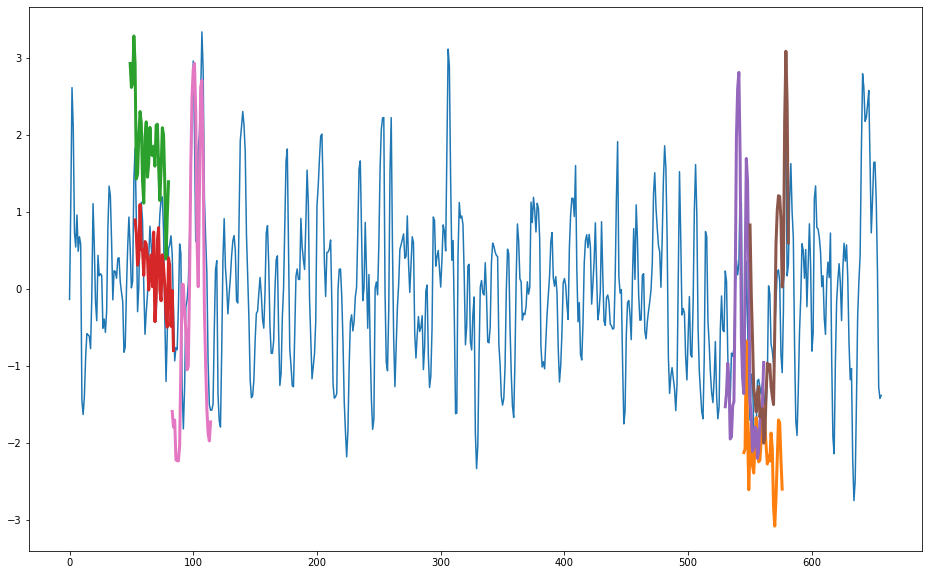

In [17]:
plt.rcParams['figure.figsize'] = (16, 10)
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())


plt.plot(X[ts_id])
for idx_shp, shp in enumerate(shp_clf.shapelets_):


    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=3)

In [18]:
y_pred_tr = shp_clf.predict(X_train)
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Val Recall %s' % recall_score(y_train, y_pred_tr,average=None))
print('Val Precision %s' % precision_score(y_train, y_pred_tr,average=None))

print(classification_report(y_train, y_pred_tr))

confusion_matrix(y_train, y_pred_tr)



94/94 [==============================] - 1s 7ms/step
Train Accuracy 0.45796064400715564
Train F1-score [0.38425197 0.47546729 0.6127239  0.26895854]
Val Recall [0.3490701  0.58226037 0.71060172 0.19027182]
Val Precision [0.42732049 0.4017769  0.53854506 0.45862069]
              precision    recall  f1-score   support

  Electronic       0.43      0.35      0.38       699
Experimental       0.40      0.58      0.48       699
     Hip-Hop       0.54      0.71      0.61       698
        Rock       0.46      0.19      0.27       699

    accuracy                           0.46      2795
   macro avg       0.46      0.46      0.44      2795
weighted avg       0.46      0.46      0.44      2795



array([[244, 217, 186,  52],
       [106, 407, 122,  64],
       [ 76,  85, 496,  41],
       [145, 304, 117, 133]], dtype=int64)

In [19]:
y_pred = shp_clf.predict(X_test)

print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))


print('Train F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Val Recall %s' % recall_score(y_test, y_pred,average=None))
print('Val Precision %s' % precision_score(y_test, y_pred,average=None))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

40/40 [==============================] - 0s 7ms/step
Val Accuracy 0.4429
Train F1-score [0.34944238 0.46930423 0.60667634 0.25570776]
Val Recall [0.31333333 0.57333333 0.69899666 0.18666667]
Val Precision [0.39495798 0.39722864 0.53589744 0.4057971 ]
              precision    recall  f1-score   support

  Electronic       0.39      0.31      0.35       300
Experimental       0.40      0.57      0.47       300
     Hip-Hop       0.54      0.70      0.61       299
        Rock       0.41      0.19      0.26       300

    accuracy                           0.44      1199
   macro avg       0.43      0.44      0.42      1199
weighted avg       0.43      0.44      0.42      1199



array([[ 94,  87,  84,  35],
       [ 50, 172,  51,  27],
       [ 36,  34, 209,  20],
       [ 58, 140,  46,  56]], dtype=int64)

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 1.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 94  87  84  35]
 [ 50 172  51  27]
 [ 36  34 209  20]
 [ 58 140  46  56]]


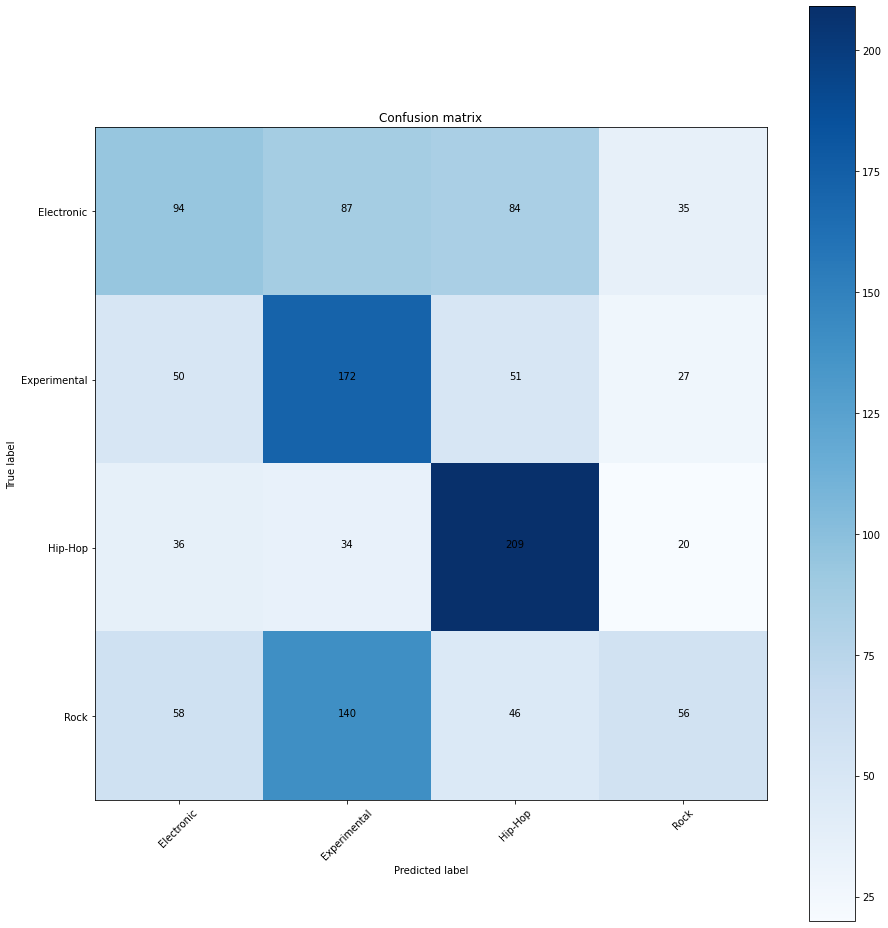

In [21]:
plt.rcParams['figure.figsize'] = (13, 13)

cm1=confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm1, classes=shp_clf.classes_,
                      title='Confusion matrix')



plt.show()

## knn su distanze da shapelets

In [22]:
X_trainKNN = shp_clf.transform(X_train)
X_testKNN = shp_clf.transform(X_test)

40/40 [==============================] - 0s 6ms/step


In [23]:
X_trainKNN.shape

(2795, 6)

In [24]:
X_train.shape

(2795, 657)

In [98]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [99]:
param_grid = {'n_neighbors': range(3,70),
              'weights':['uniform', 'distance'],
              'p' : [1,2]}


dt1 = GridSearchCV(KNeighborsClassifier(), 
                         param_grid, cv=StratifiedKFold(5))

dt1_fit = dt1.fit(X_trainKNN, y_train)
report(dt1_fit.cv_results_, n_top=5)





Model with rank: 1
Mean validation score: 0.450 (std: 0.012)
Parameters: {'n_neighbors': 62, 'p': 1, 'weights': 'distance'}

Model with rank: 2
Mean validation score: 0.449 (std: 0.015)
Parameters: {'n_neighbors': 69, 'p': 2, 'weights': 'distance'}

Model with rank: 3
Mean validation score: 0.448 (std: 0.012)
Parameters: {'n_neighbors': 52, 'p': 1, 'weights': 'distance'}

Model with rank: 3
Mean validation score: 0.448 (std: 0.011)
Parameters: {'n_neighbors': 54, 'p': 1, 'weights': 'distance'}

Model with rank: 3
Mean validation score: 0.448 (std: 0.013)
Parameters: {'n_neighbors': 59, 'p': 1, 'weights': 'distance'}



In [104]:
clf = KNeighborsClassifier(n_neighbors=62, weights='distance',p=1)
clf.fit(X_train2, y_train)

KNeighborsClassifier(n_neighbors=62, p=1, weights='distance')

In [105]:
y_pred_tr = clf.predict(X_trainKNN)
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Val Recall %s' % recall_score(y_train, y_pred_tr,average=None))
print('Val Precision %s' % precision_score(y_train, y_pred_tr,average=None))

print(classification_report(y_train, y_pred_tr))

confusion_matrix(y_train, y_pred_tr)


Train Accuracy 1.0
Train F1-score [1. 1. 1. 1.]
Val Recall [1. 1. 1. 1.]
Val Precision [1. 1. 1. 1.]
              precision    recall  f1-score   support

  Electronic       1.00      1.00      1.00       699
Experimental       1.00      1.00      1.00       699
     Hip-Hop       1.00      1.00      1.00       698
        Rock       1.00      1.00      1.00       699

    accuracy                           1.00      2795
   macro avg       1.00      1.00      1.00      2795
weighted avg       1.00      1.00      1.00      2795



array([[699,   0,   0,   0],
       [  0, 699,   0,   0],
       [  0,   0, 698,   0],
       [  0,   0,   0, 699]], dtype=int64)

In [106]:
y_pred = clf.predict(X_testKNN)

print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))


print('Train F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Val Recall %s' % recall_score(y_test, y_pred,average=None))
print('Val Precision %s' % precision_score(y_test, y_pred,average=None))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Val Accuracy 0.4312
Train F1-score [0.28 0.44 0.58 0.38]
Val Recall [0.21 0.46 0.63 0.42]
Val Precision [0.42 0.42 0.54 0.34]
              precision    recall  f1-score   support

  Electronic       0.42      0.21      0.28       300
Experimental       0.42      0.46      0.44       300
     Hip-Hop       0.54      0.63      0.58       299
        Rock       0.34      0.42      0.38       300

    accuracy                           0.43      1199
   macro avg       0.43      0.43      0.42      1199
weighted avg       0.43      0.43      0.42      1199



array([[ 64,  71,  75,  90],
       [ 29, 139,  38,  94],
       [ 31,  22, 189,  57],
       [ 29,  99,  47, 125]], dtype=int64)

Confusion matrix, without normalization
[[ 64  71  75  90]
 [ 29 139  38  94]
 [ 31  22 189  57]
 [ 29  99  47 125]]


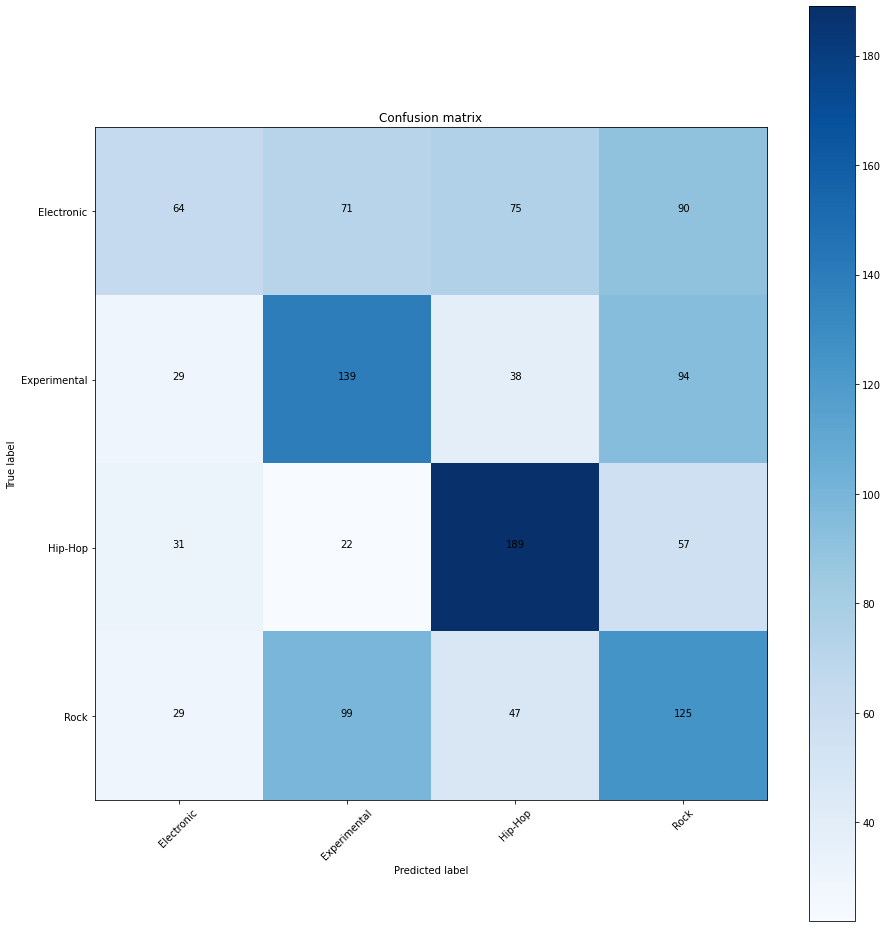

In [107]:
plt.rcParams['figure.figsize'] = (13, 13)

cm1=confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm1, classes=shp_clf.classes_,
                      title='Confusion matrix')



plt.show()

## decision tree su distanze da shapelets

In [144]:
X_trainDTREE = shp_clf.transform(X_train)
X_testDTREE = shp_clf.transform(X_test)

5/5 [==============================] - 0s 36ms/step


In [109]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split' : range(10,70,10),
              'min_samples_leaf' : range(10,70,10),
              'max_depth': range(1, 20)}


clf1 = GridSearchCV(DecisionTreeClassifier(), 
                         param_grid, cv=StratifiedKFold(5),scoring='accuracy')

clf1 = clf1.fit(X_trainDTREE, y_train)
report(clf1.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: 0.441 (std: 0.020)
Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.441 (std: 0.020)
Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 20}

Model with rank: 1
Mean validation score: 0.441 (std: 0.020)
Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 30}

Model with rank: 1
Mean validation score: 0.441 (std: 0.020)
Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 40}

Model with rank: 1
Mean validation score: 0.441 (std: 0.020)
Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 50}

Model with rank: 1
Mean validation score: 0.441 (std: 0.020)
Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 60}



In [145]:
clf = DecisionTreeClassifier(max_depth=6, random_state=0,criterion='entropy',min_samples_leaf=50,min_samples_split=10)
clf.fit(X_trainDTREE, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=50,
                       min_samples_split=10, random_state=0)

In [146]:
y_pred_tr = clf.predict(X_trainDTREE)
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print('Val Recall %s' % recall_score(y_train, y_pred_tr,average=None))
print('Val Precision %s' % precision_score(y_train, y_pred_tr,average=None))

print(classification_report(y_train, y_pred_tr))

confusion_matrix(y_train, y_pred_tr)


Train Accuracy 0.47584973166368516
Train F1-score [0.43 0.49 0.59 0.39]
Val Recall [0.4  0.56 0.57 0.37]
Val Precision [0.47 0.43 0.6  0.41]
              precision    recall  f1-score   support

  Electronic       0.47      0.40      0.43       699
Experimental       0.43      0.56      0.49       699
     Hip-Hop       0.60      0.57      0.59       698
        Rock       0.41      0.37      0.39       699

    accuracy                           0.48      2795
   macro avg       0.48      0.48      0.47      2795
weighted avg       0.48      0.48      0.47      2795



array([[279, 170, 109, 141],
       [122, 390,  67, 120],
       [ 79, 105, 400, 114],
       [114, 236,  88, 261]], dtype=int64)

In [147]:
y_pred = clf.predict(X_testDTREE)

print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))


print('Train F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Val Recall %s' % recall_score(y_test, y_pred,average=None))
print('Val Precision %s' % precision_score(y_test, y_pred,average=None))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Val Accuracy 0.4320
Train F1-score [0.37 0.46 0.57 0.32]
Val Recall [0.34 0.53 0.55 0.31]
Val Precision [0.4  0.41 0.6  0.33]
              precision    recall  f1-score   support

  Electronic       0.40      0.34      0.37       300
Experimental       0.41      0.53      0.46       300
     Hip-Hop       0.60      0.55      0.57       299
        Rock       0.33      0.31      0.32       300

    accuracy                           0.43      1199
   macro avg       0.43      0.43      0.43      1199
weighted avg       0.43      0.43      0.43      1199



array([[103,  74,  49,  74],
       [ 51, 158,  30,  61],
       [ 46,  36, 164,  53],
       [ 58, 118,  31,  93]], dtype=int64)

Confusion matrix, without normalization
[[103  74  49  74]
 [ 51 158  30  61]
 [ 46  36 164  53]
 [ 58 118  31  93]]


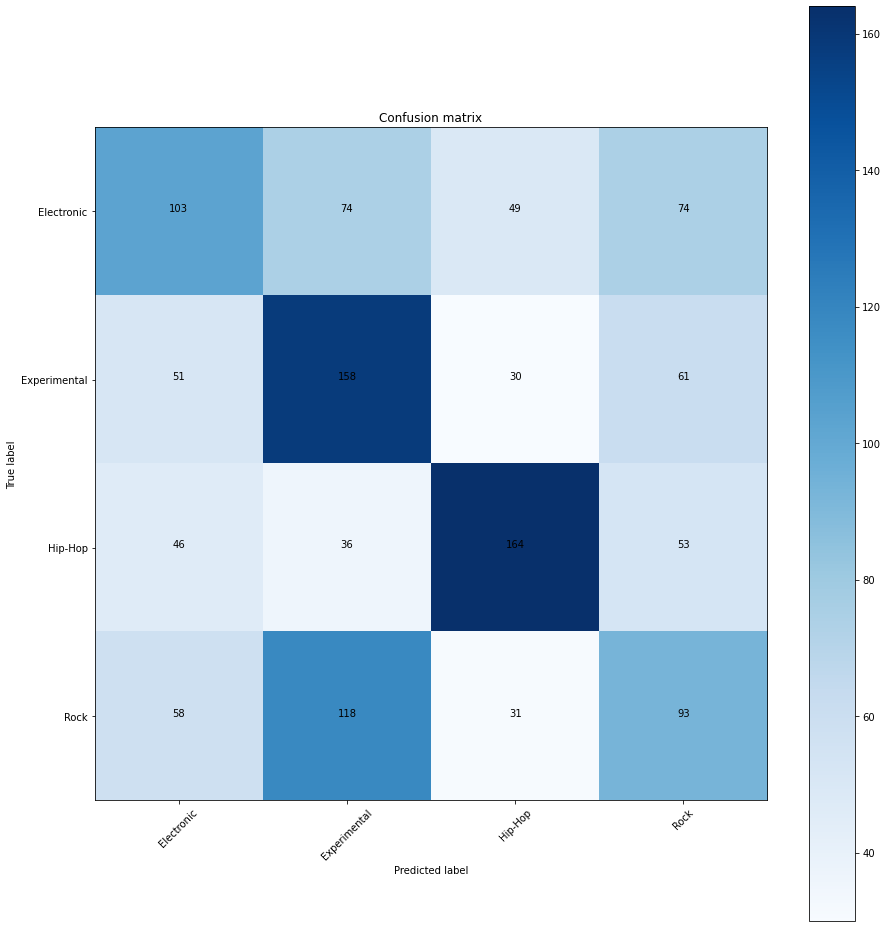

In [148]:
plt.rcParams['figure.figsize'] = (13, 13)

cm1=confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm1, classes=shp_clf.classes_,
                      title='Confusion matrix')



plt.show()

# random forest su tutti i 657 time-stamp

In [114]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [121]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split' : range(30,80,10),
              'min_samples_leaf' : range(30,80,10),
              'max_depth': range(8, 20, 3),
            'max_features':[20],
              'n_estimators':[100]
             }


clf1 = RandomizedSearchCV(RandomForestClassifier(), 
                         param_grid, cv=StratifiedKFold(3), scoring='f1_macro',n_iter=30,random_state=0)

clf1 = clf1.fit(X_train, y_train)
report(clf1.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: 0.349 (std: 0.027)
Parameters: {'n_estimators': 100, 'min_samples_split': 30, 'min_samples_leaf': 30, 'max_features': 20, 'max_depth': 11, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.334 (std: 0.005)
Parameters: {'n_estimators': 100, 'min_samples_split': 60, 'min_samples_leaf': 40, 'max_features': 20, 'max_depth': 17, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.332 (std: 0.002)
Parameters: {'n_estimators': 100, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_features': 20, 'max_depth': 11, 'criterion': 'gini'}

Model with rank: 4
Mean validation score: 0.331 (std: 0.011)
Parameters: {'n_estimators': 100, 'min_samples_split': 30, 'min_samples_leaf': 40, 'max_features': 20, 'max_depth': 17, 'criterion': 'gini'}

Model with rank: 5
Mean validation score: 0.327 (std: 0.012)
Parameters: {'n_estimators': 100, 'min_samples_split': 30, 'min_samples_leaf': 40, 'max_features': 20, 'max_depth': 17, '

In [122]:
clf1 = RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_split=30, min_samples_leaf=30,
                             max_features=20,random_state=0,n_estimators=100)
clf1 = clf1.fit(X_train, y_train)

In [123]:
y_pred_tr = clf1.predict(X_train)
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average='macro'))
print('Val Recall %s' % recall_score(y_train, y_pred_tr,average='macro'))
print('Val Precision %s' % precision_score(y_train, y_pred_tr,average='macro'))

print(classification_report(y_train, y_pred_tr))

confusion_matrix(y_train, y_pred_tr)


Train Accuracy 0.9016100178890877
Train F1-score 0.9016655033593485
Val Recall 0.9016247115199364
Val Precision 0.9043536283151985
              precision    recall  f1-score   support

  Electronic       0.97      0.85      0.90       699
Experimental       0.89      0.92      0.91       699
     Hip-Hop       0.90      0.94      0.92       698
        Rock       0.86      0.90      0.88       699

    accuracy                           0.90      2795
   macro avg       0.90      0.90      0.90      2795
weighted avg       0.90      0.90      0.90      2795



array([[592,  35,  35,  37],
       [  7, 642,  13,  37],
       [  2,   8, 658,  30],
       [ 10,  34,  27, 628]], dtype=int64)

In [124]:
y_pred = clf1.predict(X_test)

print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))


print('Train F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print('Val Recall %s' % recall_score(y_test, y_pred,average='macro'))
print('Val Precision %s' % precision_score(y_test, y_pred,average='macro'))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Val Accuracy 0.3553
Train F1-score 0.34463276648579594
Val Recall 0.35544871794871796
Val Precision 0.34486774834606443
              precision    recall  f1-score   support

  Electronic       0.29      0.18      0.22       300
Experimental       0.33      0.33      0.33       300
     Hip-Hop       0.41      0.54      0.46       299
        Rock       0.35      0.38      0.36       300

    accuracy                           0.36      1199
   macro avg       0.34      0.36      0.34      1199
weighted avg       0.34      0.36      0.34      1199



array([[ 54,  81,  86,  79],
       [ 39,  98,  78,  85],
       [ 46,  48, 161,  44],
       [ 48,  69,  70, 113]], dtype=int64)

# Feature-based Classifier con decision tree

In [34]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        'max': np.max(values),
        'min': np.min(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [35]:
columnsFeatures=['avg','std','var','med','max','min','10p','25p','50p','75p','90p','iqr','cov','skw','kur']

In [36]:
df_feat=pd.DataFrame(index =TS.index,columns=columnsFeatures)

In [37]:
df_feat

,avg,std,var,med,max,min,10p,25p,50p,75p,90p,iqr,cov,skw,kur
track_id,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
for track in TS.index:
    features=calculate_features(df.loc[track])
    df_feat.loc[track]=list(features.values())

In [39]:
df_feat

,avg,std,var,med,max,min,10p,25p,50p,75p,90p,iqr,cov,skw,kur
track_id,,,,,,,,,,,,,,,
2,-2.53476e-17,1,1,0.012986,3.33393,-2.7431,-1.31887,-0.697471,0.012986,0.595689,1.19036,1.29316,-2.53476e-17,0.302632,0.153479
5,-4.32598e-17,1,1,-0.0703022,3.63437,-2.08083,-1.27855,-0.761441,-0.0703022,0.653864,1.34932,1.41531,-4.32598e-17,0.392194,-0.110358
148,-5.42607e-16,1,1,0.202402,2.61986,-2.58855,-1.35615,-0.84565,0.202402,0.715365,1.06946,1.56102,-5.42607e-16,-0.0743908,-0.586615
182,-8.80574e-16,1,1,-0.0579018,3.1434,-2.71726,-1.23025,-0.730492,-0.0579018,0.639772,1.31092,1.37026,-8.80574e-16,0.342761,-0.027788
255,-2.70374e-17,1,1,-0.034632,4.37095,-3.09871,-0.917371,-0.536897,-0.034632,0.456362,1.10372,0.993259,-2.70374e-17,0.432317,3.28427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,-5.69475e-16,1,1,-0.254907,2.54466,-1.66198,-1.09727,-0.757089,-0.254907,0.743509,1.58947,1.5006,-5.69475e-16,0.672587,-0.628462
154307,-8.17881e-17,1,1,-0.172767,2.54232,-1.95414,-1.14347,-0.580566,-0.172767,0.383511,1.70074,0.964077,-8.17881e-17,0.701651,0.158221
154308,-4.65212e-16,1,1,-0.142558,3.68398,-2.18087,-1.00467,-0.30974,-0.142558,0.0976064,1.62974,0.407346,-4.65212e-16,1.01551,1.52822


In [41]:


X = df_feat.values
y = TS['genre_top']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [44]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split' : range(10,70,10),
              'min_samples_leaf' : range(10,70,10),
              'max_depth': range(1, 20)}


clf1 = GridSearchCV(DecisionTreeClassifier(), 
                         param_grid, cv=StratifiedKFold(5),scoring='accuracy')

clf1 = clf1.fit(X_train, y_train)
report(clf1.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: 0.382 (std: 0.011)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.382 (std: 0.011)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 20}

Model with rank: 1
Mean validation score: 0.382 (std: 0.011)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 30}

Model with rank: 1
Mean validation score: 0.382 (std: 0.011)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 40}

Model with rank: 1
Mean validation score: 0.382 (std: 0.011)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 50}

Model with rank: 1
Mean validation score: 0.382 (std: 0.011)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 60}



In [45]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0,criterion='gini',min_samples_leaf=20,min_samples_split=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=10,
                       random_state=0)

In [47]:
y_pred_tr = clf.predict(X_train)
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average='macro'))
print('Val Recall %s' % recall_score(y_train, y_pred_tr,average='macro'))
print('Val Precision %s' % precision_score(y_train, y_pred_tr,average='macro'))

print(classification_report(y_train, y_pred_tr))

confusion_matrix(y_train, y_pred_tr)


Train Accuracy 0.3932021466905188
Train F1-score 0.3774888390152552
Val Recall 0.3932131862546167
Val Precision 0.4179131699601344
              precision    recall  f1-score   support

  Electronic       0.36      0.56      0.44       699
Experimental       0.47      0.15      0.22       699
     Hip-Hop       0.33      0.42      0.37       698
        Rock       0.51      0.44      0.47       699

    accuracy                           0.39      2795
   macro avg       0.42      0.39      0.38      2795
weighted avg       0.42      0.39      0.38      2795



array([[391,  35, 194,  79],
       [251, 103, 225, 120],
       [269,  32, 296, 101],
       [168,  50, 172, 309]], dtype=int64)

In [49]:
y_pred = clf.predict(X_test)

print('Val Accuracy %0.4f' % accuracy_score(y_test, y_pred))


print('Train F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print('Val Recall %s' % recall_score(y_test, y_pred,average='macro'))
print('Val Precision %s' % precision_score(y_test, y_pred,average='macro'))

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Val Accuracy 0.3545
Train F1-score 0.3302171560182806
Val Recall 0.35453455964325525
Val Precision 0.360087739729544
              precision    recall  f1-score   support

  Electronic       0.30      0.47      0.37       300
Experimental       0.33      0.07      0.12       300
     Hip-Hop       0.35      0.44      0.39       299
        Rock       0.46      0.43      0.44       300

    accuracy                           0.35      1199
   macro avg       0.36      0.35      0.33      1199
weighted avg       0.36      0.35      0.33      1199



array([[142,  18,  85,  55],
       [122,  22, 103,  53],
       [112,  11, 132,  44],
       [ 95,  15,  61, 129]], dtype=int64)